In [1]:
import diff_viz
from diff_viz.diffusion_modes import plot_diffusion_modes_single_label, plot_diffusion_modes
from diff_viz import data_loading
import pandas as pd
from diff_viz.msd import msd_viz
import diff_classifier
import diff_classifier.heatmaps as hm
import numpy as np
from os import getcwd, chdir
import diff_predictor
from diff_predictor import data_process

In [2]:
data_path = '/Users/nelsschimek/Documents/nancelab/diff_viz/diff_viz/tests/testing_data/'

In [19]:
p14_file = 'features_P14_40nm_s1_v1.csv'
p35_file = 'features_P35_brain_2_slice_1_vid_1.csv'
p70_file = 'features_P70_40nm_s1_v3.csv'

In [20]:
df_p14 = pd.read_csv(data_path+p14_file)
df_p14.head()

,Unnamed: 0,Track_ID,alpha,D_fit,kurtosis,asymmetry1,asymmetry2,asymmetry3,AR,elongation,...,Mean convex_hull,Std convex_hull,Mean convex_hull_norm,Std convex_hull_norm,Mean dist_tot,Std dist_tot,Mean dist_net,Std dist_net,Mean progression,Std progression
0,0,0.0,0.145892,115.910645,3.051675,0.744942,0.271071,0.179650,1.287207,0.223124,...,0.0,0.0,0.0,0.0,25621.753218,10363.797033,1800.021676,64.057425,0.080031,0.025167
1,1,1.0,2.193719,1.611728,3.180184,0.851672,0.200292,0.250967,2.605750,0.616233,...,0.0,0.0,0.0,0.0,26835.693671,8364.829289,2312.473896,61.022111,0.093691,0.024171
2,2,2.0,1.649381,12.301497,1.654691,0.989301,0.051857,0.521313,3.210672,0.688539,...,0.0,0.0,0.0,0.0,24169.173272,7667.671923,1991.842371,76.548932,0.090450,0.025825
3,3,3.0,0.756172,50.106737,2.428506,0.990430,0.049030,0.529145,3.600695,0.722276,...,0.0,0.0,0.0,0.0,24169.173272,7667.671923,1991.842371,76.548932,0.090450,0.025825
4,4,4.0,2.153309,3.674387,2.894523,0.996028,0.031544,0.581089,4.677014,0.786188,...,0.0,0.0,0.0,0.0,25686.973833,12240.490368,2002.856919,108.115520,0.091822,0.030371


In [21]:
df_p35 = pd.read_csv(data_path+p35_file)
df_p35.head()

,Unnamed: 0,Track_ID,alpha,D_fit,kurtosis,asymmetry1,asymmetry2,asymmetry3,AR,elongation,...,Mean convex_hull,Std convex_hull,Mean convex_hull_norm,Std convex_hull_norm,Mean dist_tot,Std dist_tot,Mean dist_net,Std dist_net,Mean progression,Std progression
0,0,0.0,0.445227,16.493781,5.457711,0.900742,0.161642,0.301680,2.104323,0.524788,...,0.0,0.0,0.0,0.0,53446.037923,39383.730785,2193.565956,17.904650,0.065281,0.040573
1,1,1.0,0.107756,0.316246,3.334612,0.071551,0.760212,0.009322,1.213024,0.175614,...,0.0,0.0,0.0,0.0,69929.668778,50752.744606,1793.547419,1.447172,0.053308,0.044553
2,2,2.0,0.046968,0.440548,2.587983,0.054303,0.788683,0.007003,1.087747,0.080668,...,0.0,0.0,0.0,0.0,69929.668778,50752.744606,1793.547419,1.447172,0.053308,0.044553
3,3,3.0,1.759901,2.452218,2.516403,0.984714,0.062057,0.494242,3.654338,0.726353,...,0.0,0.0,0.0,0.0,53446.037923,39383.730785,2193.565956,17.904650,0.065281,0.040573
4,4,4.0,0.438945,8.270880,2.176721,0.997136,0.026778,0.596387,5.244316,0.809317,...,0.0,0.0,0.0,0.0,53446.037923,39383.730785,2193.565956,17.904650,0.065281,0.040573


In [22]:
df_p70 = pd.read_csv(data_path+p70_file)
df_p70.head()

,Unnamed: 0,Track_ID,alpha,D_fit,kurtosis,asymmetry1,asymmetry2,asymmetry3,AR,elongation,...,Mean Quality,Std Quality,Mean Mean_Intensity,Std Mean_Intensity,Mean SN_Ratio,Std SN_Ratio,Mean Deff1,Std Deff1,Mean Deff2,Std Deff2
0,0,0.0,1.657537e+00,1.783075,4.226671,0.930665,0.134023,0.344701,2.522960,0.603640,...,28.639358,11.964434,NaN,NaN,1.287645,0.366536,8.171783,1.693036,NaN,NaN
1,1,1.0,2.050138e+00,0.543694,2.238173,0.909967,0.153565,0.313613,1.892574,0.471619,...,28.639358,11.964434,NaN,NaN,1.287645,0.366536,8.171783,1.693036,NaN,NaN
2,2,2.0,1.214999e+00,5.172510,2.464477,0.971957,0.084325,0.440927,2.803120,0.643255,...,21.435321,3.249867,NaN,NaN,1.554142,0.220737,4.463147,2.391024,NaN,NaN
3,3,3.0,1.345136e-08,0.760495,2.760799,0.991866,0.045187,0.540033,3.828901,0.738828,...,15.494168,0.000000,NaN,NaN,1.344718,0.000000,0.154858,0.000000,NaN,NaN
4,4,4.0,1.172734e-06,24.348918,2.369314,0.573833,0.371441,0.110963,1.395375,0.283347,...,21.435321,3.249867,NaN,NaN,1.554142,0.220737,4.463147,2.391024,NaN,NaN


In [23]:
ecm = data_process.generate_fullstats(data_path, [p14_file, p35_file, p70_file], ['P14', 'P35', 'P70'], 'age')
ecm

Adding file features_P14_40nm_s1_v1.csv size: (793, 91)
Adding file features_P35_brain_2_slice_1_vid_1.csv size: (416, 91)
Adding file features_P70_40nm_s1_v3.csv size: (25, 67)


/Users/nelsschimek/anaconda3/envs/streamlit_diff_viz/lib/python3.9/site-packages/diff_predictor/data_process.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fstats_tot = fstats_tot.append(fstats, ignore_index=True)
/Users/nelsschimek/anaconda3/envs/streamlit_diff_viz/lib/python3.9/site-packages/diff_predictor/data_process.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fstats_tot = fstats_tot.append(fstats, ignore_index=True)


,Track_ID,alpha,D_fit,kurtosis,asymmetry1,asymmetry2,asymmetry3,AR,elongation,boundedness,...,Std convex_hull_norm,Mean dist_tot,Std dist_tot,Mean dist_net,Std dist_net,Mean progression,Std progression,age,Filename,Video Number
0,0.0,1.458918e-01,115.910645,3.051675,0.744942,0.271071,0.179650,1.287207,0.223124,0.157897,...,0.0,25621.753218,10363.797033,1800.021676,64.057425,0.080031,0.025167,P14,features_P14_40nm_s1_v1.csv,0
1,1.0,2.193719e+00,1.611728,3.180184,0.851672,0.200292,0.250967,2.605750,0.616233,0.030720,...,0.0,26835.693671,8364.829289,2312.473896,61.022111,0.093691,0.024171,P14,features_P14_40nm_s1_v1.csv,0
2,2.0,1.649381e+00,12.301497,1.654691,0.989301,0.051857,0.521313,3.210672,0.688539,0.041548,...,0.0,24169.173272,7667.671923,1991.842371,76.548932,0.090450,0.025825,P14,features_P14_40nm_s1_v1.csv,0
3,3.0,7.561725e-01,50.106737,2.428506,0.990430,0.049030,0.529145,3.600695,0.722276,0.128690,...,0.0,24169.173272,7667.671923,1991.842371,76.548932,0.090450,0.025825,P14,features_P14_40nm_s1_v1.csv,0
4,4.0,2.153309e+00,3.674387,2.894523,0.996028,0.031544,0.581089,4.677014,0.786188,0.154286,...,0.0,25686.973833,12240.490368,2002.856919,108.115520,0.091822,0.030371,P14,features_P14_40nm_s1_v1.csv,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,20.0,8.235284e-02,3.233085,1.831472,0.978860,0.073086,0.466907,2.817264,0.645046,0.111742,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P70,features_P70_40nm_s1_v3.csv,2
1230,21.0,8.314760e-02,5.130831,4.643672,0.663740,0.319545,0.142670,1.468787,0.319166,0.105139,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P70,features_P70_40nm_s1_v3.csv,2
1231,22.0,4.528161e-08,12.927095,3.933251,0.977505,0.075419,0.461365,4.419778,0.773744,0.073549,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P70,features_P70_40nm_s1_v3.csv,2
1232,23.0,1.601281e+00,0.842433,3.609991,0.852271,0.199854,0.251489,2.528793,0.604554,0.043247,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P70,features_P70_40nm_s1_v3.csv,2


In [24]:
ecm = data_loading.clean_mpt_data(ecm, 'default', 'age')

In [25]:
ecm.head()

,alpha,D_fit,kurtosis,asymmetry1,asymmetry2,asymmetry3,AR,elongation,boundedness,fractal_dim,...,Mean elongation,Mean boundedness,Mean fractal_dim,Mean trappedness,Mean efficiency,Mean straightness,Mean MSD_ratio,Mean Deff1,Mean Deff2,age
0,0.145892,115.910645,3.051675,0.744942,0.271071,0.179650,1.287207,0.223124,0.157897,1.736748,...,0.426257,0.135306,1.591005,-0.186460,1.124217,0.291329,0.291549,14.397101,0.0,P14
1,2.193719,1.611728,3.180184,0.851672,0.200292,0.250967,2.605750,0.616233,0.030720,1.173042,...,0.685010,0.063663,1.209811,-0.207839,2.716870,0.548717,-0.113589,25.022851,0.0,P14
2,1.649381,12.301497,1.654691,0.989301,0.051857,0.521313,3.210672,0.688539,0.041548,1.161407,...,0.563162,0.094886,1.351141,-0.198456,1.997596,0.488372,-0.045811,31.317633,0.0,P14
3,0.756172,50.106737,2.428506,0.990430,0.049030,0.529145,3.600695,0.722276,0.128690,1.494690,...,0.563162,0.094886,1.351141,-0.198456,1.997596,0.488372,-0.045811,31.317633,0.0,P14
5,0.598852,20.830910,1.784513,0.660924,0.321187,0.141553,1.375282,0.272877,0.105093,1.619791,...,0.425369,0.117107,1.486425,-0.191778,0.993658,0.358448,0.039424,35.596055,0.0,P14


In [27]:
ecm.to_csv(data_path+'demo_data.csv', index=False)

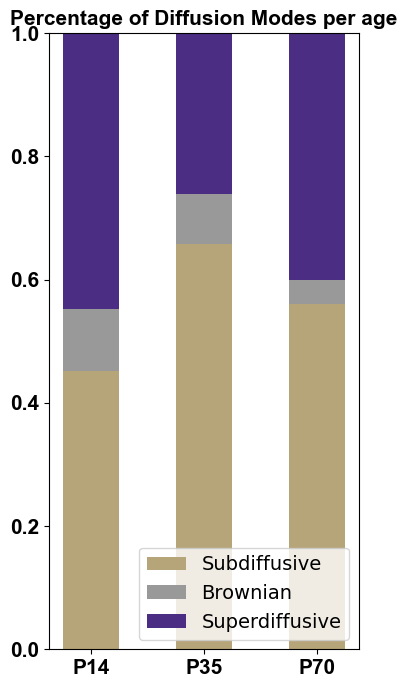

In [26]:
fig = plot_diffusion_modes(df=ecm, label_column='age')

In [12]:
geomean_df = pd.read_csv('/Users/nelsschimek/Downloads/msd_csvs_P17_OGD/msd_P17_1h_OGD_1d_40nm_slice_1_striatum_vid_1.csv', index_col='Unnamed: 0')

In [17]:
prefix = 'P17_1h_OGD_1d_40nm_slice_1_striatum_vid_1'
folder = '/Users/nelsschimek/Downloads/msd_csvs_P17_OGD'

(masked_array(data=[--, -1.179269104126528, -0.48394919192345304,
                    -0.1307918537939328, 0.09441141330877928,
                    0.2540504662355244, 0.37545716198713336,
                    0.46820060774592964, 0.5433733907242161,
                    0.6097534738994547, 0.6587218620039266,
                    0.7187482970894742, 0.7575081012906428,
                    0.8219321665252544, 0.8464338822033379,
                    0.8645601436634363, 0.8947561287794967,
                    0.9324315122855424, 0.9714480976049317,
                    1.009601771727631, 1.0506755364086282,
                    1.0632045881008487, 1.1023232905674065,
                    1.1565910943481372, 1.190073270216976,
                    1.1966367726344875, 1.2129575136591741,
                    1.23699583826945, 1.2672235564315222,
                    1.289938987660697, 1.311590016324954,
                    1.3213575582263197, 1.3619622963868125,
                    1.37836280852036

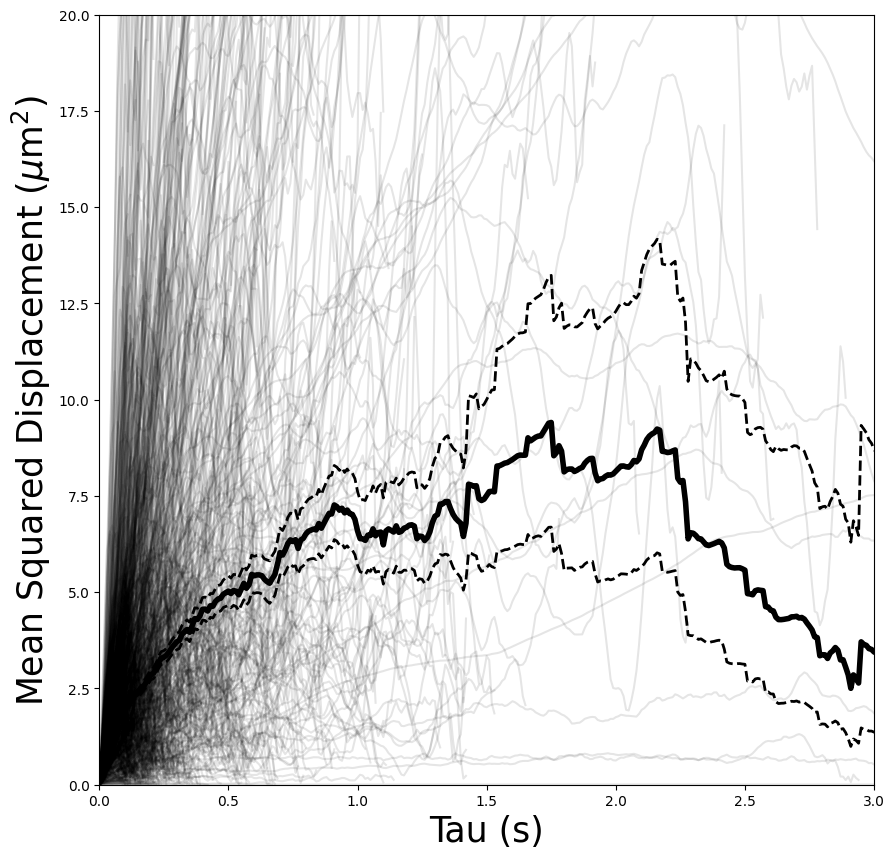

In [19]:
hm.plot_individual_msds(prefix=prefix, folder=folder, upload=False, x_range=3)

,nan
0,-2.488138
1,-1.828666
2,-1.489715
3,-1.270134
4,-1.115508
...,...
645,-1.487137
646,-1.456187
647,-1.654486
648,-1.485867


In [27]:
brendan_df = pd.read_csv('/Users/nelsschimek/Downloads/msd_013023_P10F_14DIV_1uM_continuous_ctx_1.csv', index_col='Unnamed: 0')

In [28]:
rot_prefix = '013023_P10F_14DIV_1uM_continuous_ctx_1'
rot_folder = '/Users/nelsschimek/Downloads/'

(masked_array(data=[--, -3.2547458403543126, -2.7504087360575897,
                    -2.4938575346862657, -2.3392005298984615,
                    -2.213382596032208, -2.1383571525308644,
                    -2.062029401146417, -2.029322546266927,
                    -1.975077858764256, -1.9573655794120663,
                    -1.877008282102448, -1.8511623086972113,
                    -1.7832400664233927, -1.7372124967985905,
                    -1.685029173066715, -1.6368043596982675,
                    -1.6296440540096646, -1.5984614510467112,
                    -1.6005772568865515, -1.6056182411969773,
                    -1.604837187907326, -1.5793015363904195,
                    -1.542167367678948, -1.5352541601468472,
                    -1.5315084688341063, -1.5323104222708652,
                    -1.5198658912706076, -1.516639165115188,
                    -1.5019097489738276, -1.5096827289849915,
                    -1.4938775438775962, -1.5081947291388398,
             

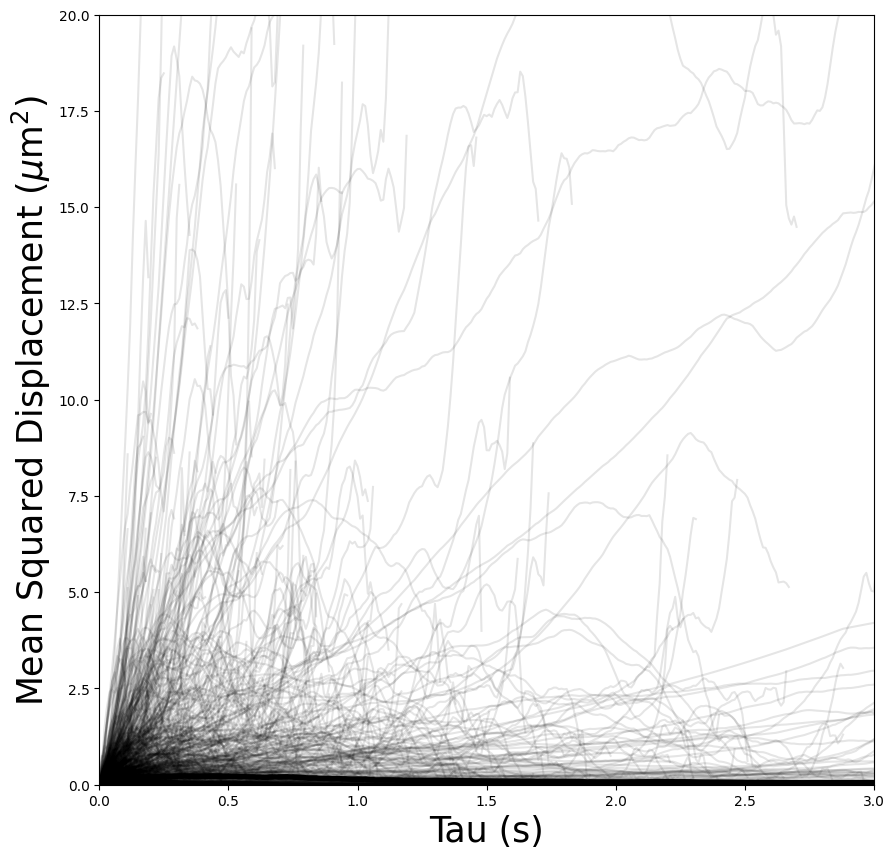

In [29]:
hm.plot_individual_msds(prefix=rot_prefix, folder=rot_folder, upload=False, x_range=3)

In [2]:
ogd_geomean_df = pd.read_csv('/Users/nelsschimek/Downloads/geomean_P17_2h_OGD_1d_40nm_slice_1_striatum_vid_1.csv')
ogd_geomean_df.head()

,nan
0,-2.482478
1,-1.792677
2,-1.441763
3,-1.204546
4,-1.035959


In [9]:
tau = ogd_geomean_df.index.values / 651
print(tau.shape)

(650,)


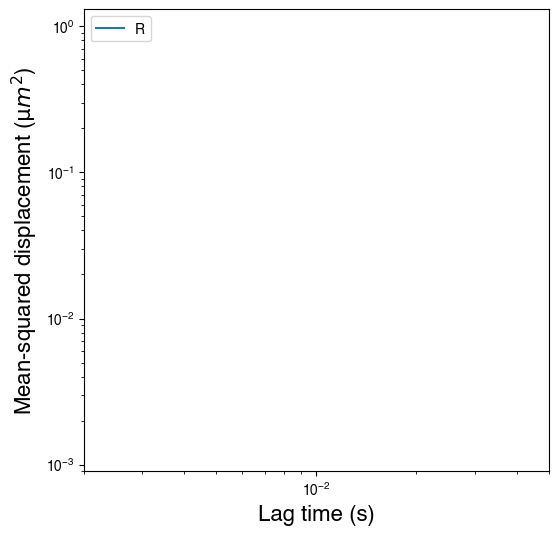

In [5]:
msd_viz(['OGD'], ogd_geomean_df, df_dose_list=['ogd'])